# **1. Importing Necessary Librares**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "darkgrid")
import warnings
warnings.filterwarnings('ignore')

# **2. Loading and Understanding The Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/Telco_customer_churn.xlsx')

In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
df.shape

(7043, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
df = df.drop(["CustomerID", "Count" , "Country" , "State" , "City" ,"Zip Code" , "Lat Long" , "Latitude" , "Longitude" , "Churn Label" , "Churn Reason" ], axis=1)

In [ ]:
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")

In [ ]:
print(df.isna().sum())

Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Value           0
Churn Score           0
CLTV                  0
dtype: int64


In [ ]:
df[df["Total Charges"].isna()]

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
2234,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0,36,2578
2438,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0,68,5504
2568,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0,45,2048
2667,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0,48,4950
2856,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0,30,4740
4331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0,53,2019
4687,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0,49,2299
5104,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0,27,3763
5719,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0,69,4890
6772,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,No,Two year,No,Mailed check,73.35,NaN,0,44,2342


In [ ]:
df["Total Charges"].fillna(0 , inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

In [ ]:
df["Churn Value"].value_counts()

,count
Churn Value,
0,5174
1,1869


In [ ]:
print(df.nunique())

Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Value             2
Churn Score            85
CLTV                 3438
dtype: int64


In [ ]:
numerical_features_list = ["Tenure Months", "Monthly Charges", "Total Charges" , "Churn Score" , "CLTV"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())


Gender ['Male' 'Female']
Senior Citizen ['No' 'Yes']
Partner ['No' 'Yes']
Dependents ['No' 'Yes']
Phone Service ['Yes' 'No']
Multiple Lines ['No' 'Yes' 'No phone service']
Internet Service ['DSL' 'Fiber optic' 'No']
Online Security ['Yes' 'No' 'No internet service']
Online Backup ['Yes' 'No' 'No internet service']
Device Protection ['No' 'Yes' 'No internet service']
Tech Support ['No' 'Yes' 'No internet service']
Streaming TV ['No' 'Yes' 'No internet service']
Streaming Movies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'Two year' 'One year']
Paperless Billing ['Yes' 'No']
Payment Method ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn Value [1 0]


In [ ]:
df.describe()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,0.265370,58.699418,4400.295755
std,24.559481,30.090047,2266.794470,0.441561,21.525131,1183.057152
min,0.000000,18.250000,0.000000,0.000000,5.000000,2003.000000
25%,9.000000,35.500000,398.550000,0.000000,40.000000,3469.000000
50%,29.000000,70.350000,1394.550000,0.000000,61.000000,4527.000000
75%,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


# **Insights :**

1. CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude, Churn Label and Churn Reason  colums removed as they arent useful in training.
2. No missing values found in data
3. Missing values in Total Charges filled with zero.
4. Classes are imbalanced.


# **3. Exploratory Data Analysis**
**Histogram with KDE Curve for Numeric Colums**

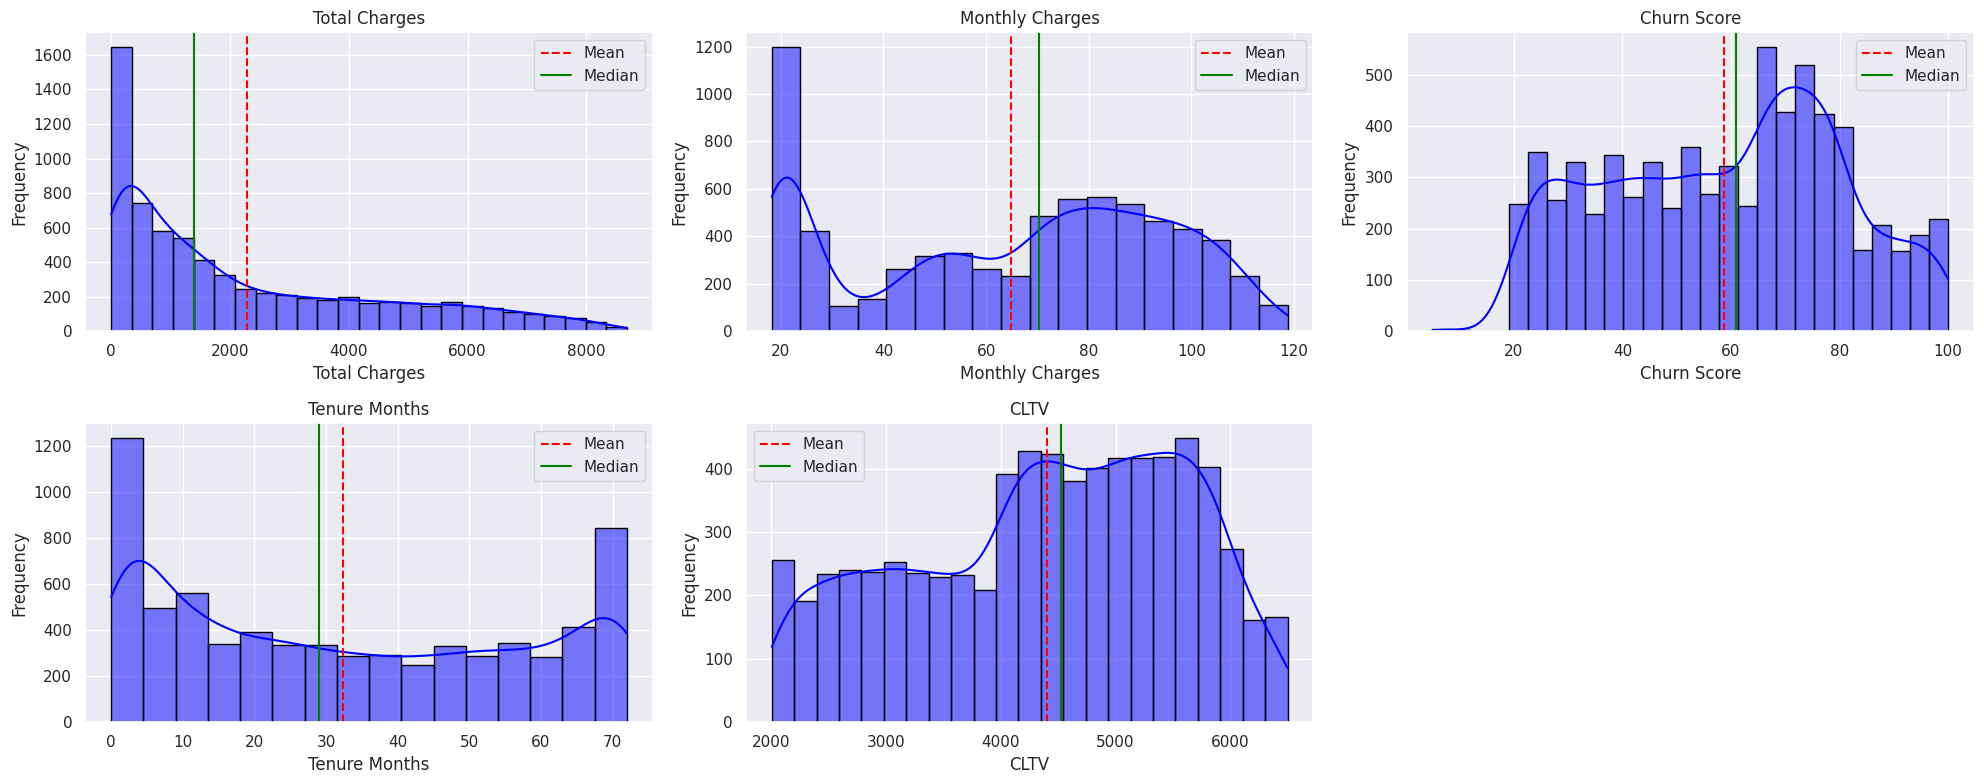

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Total Charges', 'Monthly Charges', 'Churn Score', 'Tenure Months', 'CLTV']

plt.figure(figsize=(20, 8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True , color = "blue" , edgecolor = "black")
    plt.title(f"{col}")
    col_mean = df[f"{col}"].mean()
    col_median = df[f"{col}"].median()

    plt.xlabel(col)
    plt.ylabel("Frequency")

    plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
    plt.axvline(col_median, color="green", linestyle="-", label="Median")
    plt.legend()

plt.tight_layout()
plt.show()


**Boxplot for Numeric Colums**

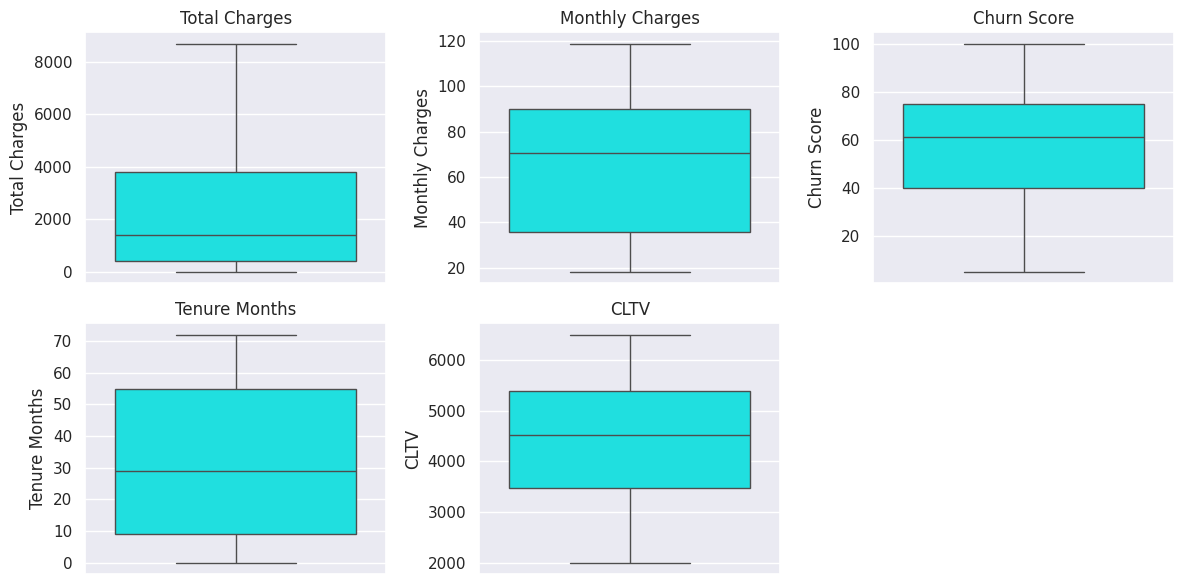

In [ ]:
plt.figure(figsize=(12, 6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[col], color = "cyan")
    plt.title(f"{col}")

plt.tight_layout()
plt.show()

In [ ]:
outlier_dict = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_dict[col] = outliers
    print(f"Outliers in {col}: {len(outliers)} rows")

Outliers in Total Charges: 0 rows
Outliers in Monthly Charges: 0 rows
Outliers in Churn Score: 0 rows
Outliers in Tenure Months: 0 rows
Outliers in CLTV: 0 rows


# **Insight**
**No Outliers found.**

# **Countplot for Categorical Columns**

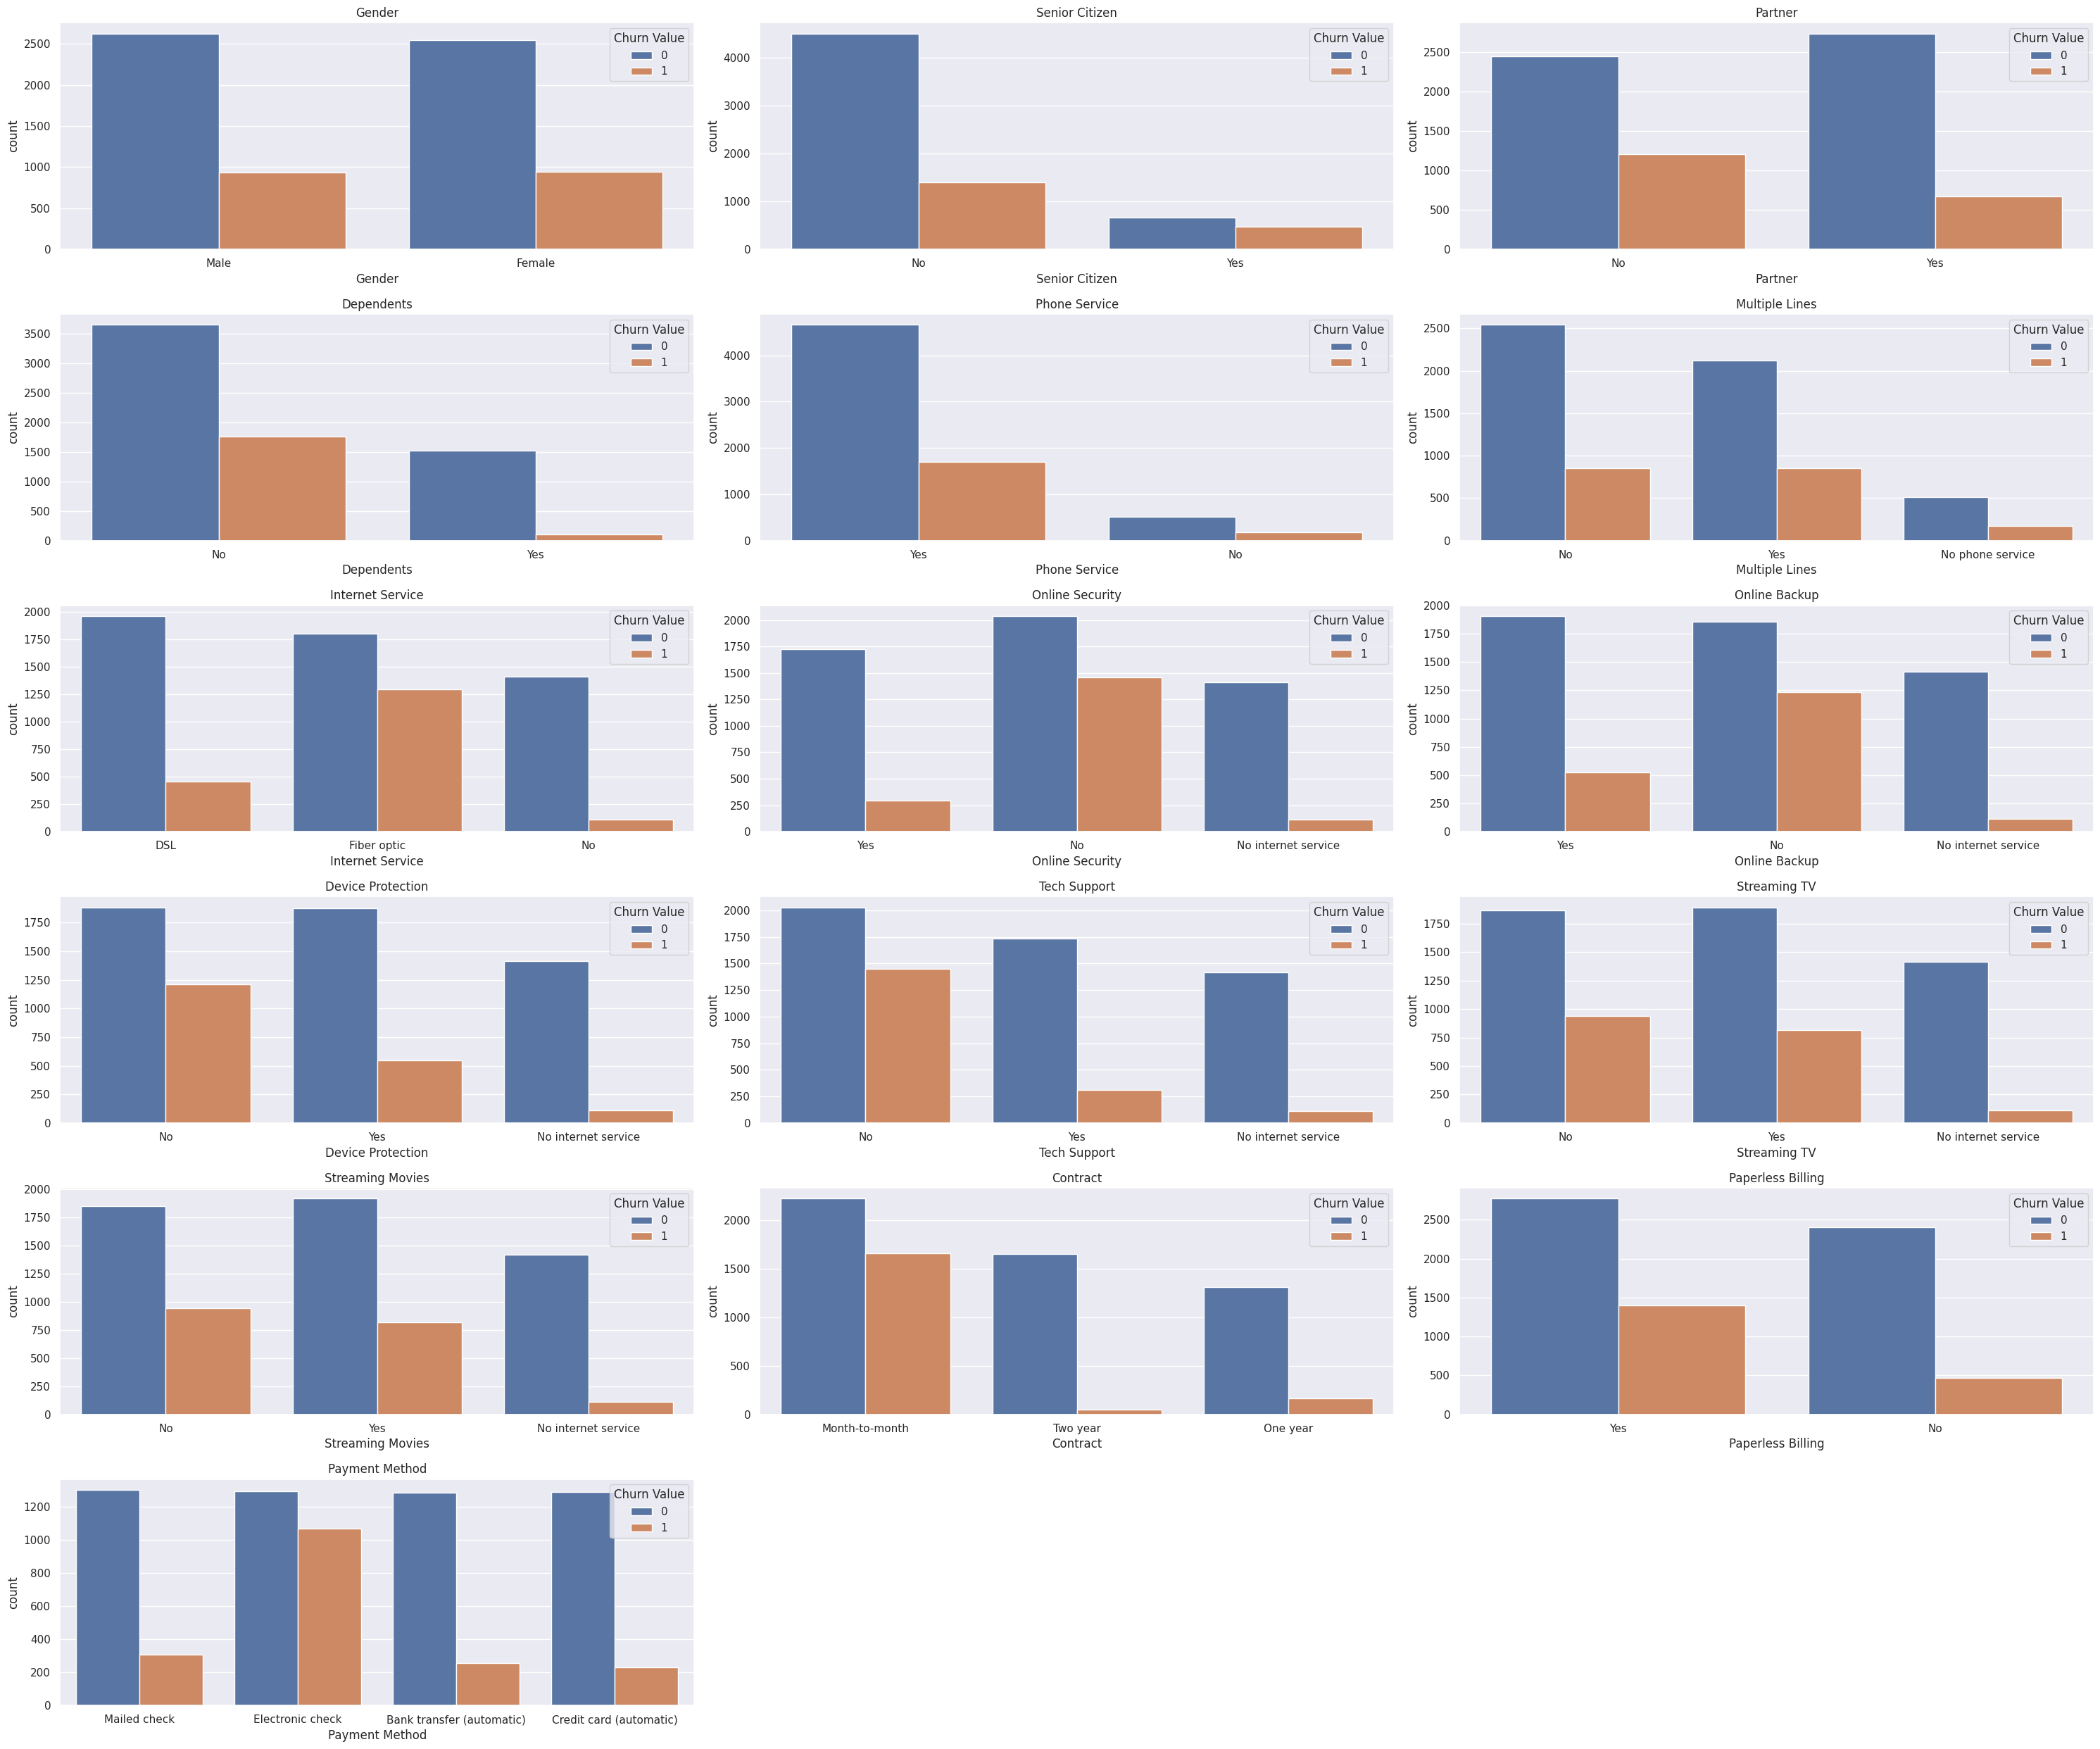

In [ ]:
plt.figure(figsize=(30, 25))

categorical_cols = df.select_dtypes(include=['object'])

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 3, i)
    sns.countplot(df , x = df[col] , hue = "Churn Value")
    plt.title(f"{col}")
plt.tight_layout()
plt.show()


# **4. Data Preprocessing**

**Encoding the Categoical Columns by Adding Dummy Column**

In [ ]:
df = pd.get_dummies(df, columns=["Gender", "Senior Citizen", "Partner", "Dependents", "Phone Service", "Multiple Lines", "Internet Service", "Online Security", "Online Backup", "Device Protection", "Tech Support", "Streaming TV", "Streaming Movies", "Contract", "Paperless Billing", "Payment Method"], drop_first=True)

**Finding Correlation Between Different Columns**

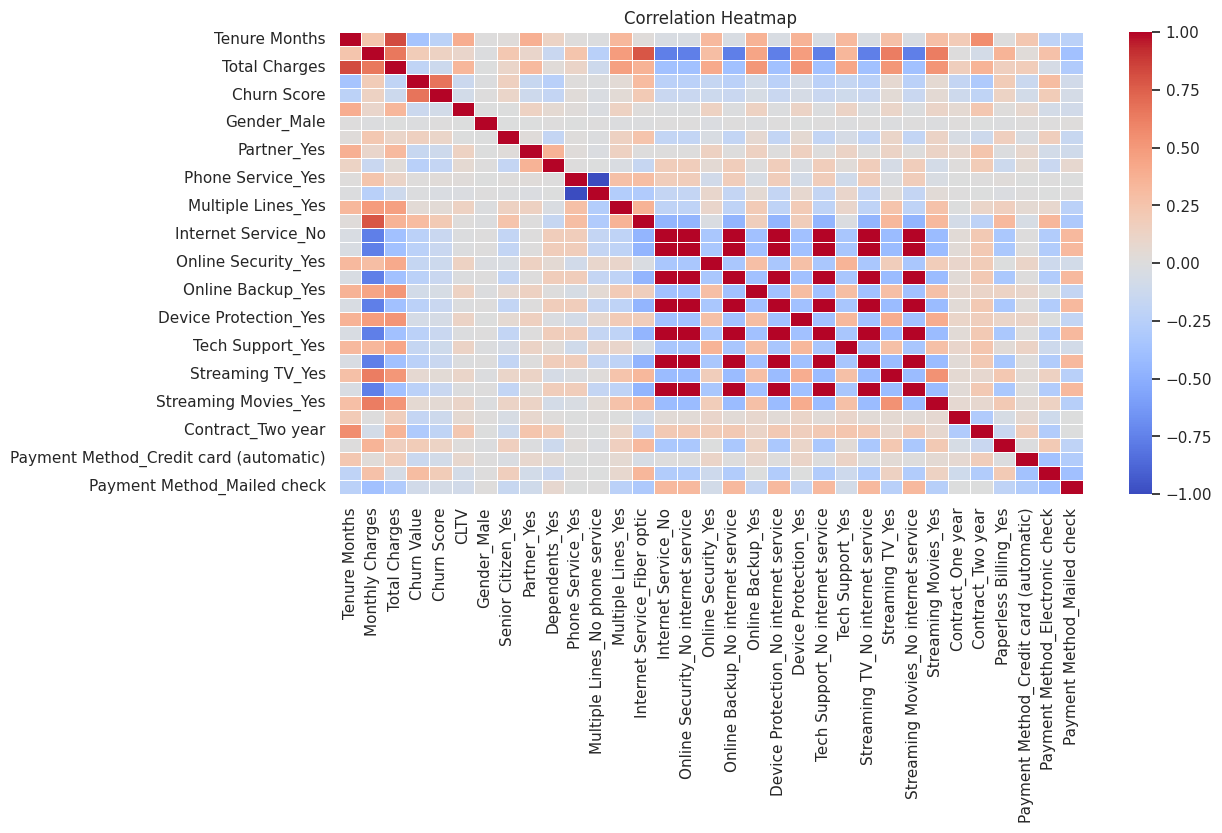

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Splitting the Dataset for Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop("Churn Value" , axis = 1)
y = df["Churn Value"]
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

**Fixing the Class Imbalance using Synthetic Minority Oversampling Technique(SMOTE)**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = "auto" , random_state = 42)
x_train_smote , y_train_smote = smote.fit_resample(x_train , y_train)

**Scaling the Features using Standard Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
slr = StandardScaler()
x_train_scaled = slr.fit_transform(x_train_smote)
x_test_scaled = slr.transform(x_test)

**Importing the modules which will be used for Training and Testing**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Tuning the Hyperparameters**

In [ ]:
models = {

    "Ridge" : Ridge(),

    "Random Forest" : RandomForestClassifier(),

    "XGBoost" : XGBClassifier(),
}


param_grid = {

    "Ridge" : {"alpha" : [0.001 , 0.01 , 0.1 , 1 , 10 , 100]},

    "Random Forest" : {
        "n_estimators" : [50 , 100 , 200],
        "max_depth" : [None , 10 , 20]
    },

    "XGBoost" : {
        "n_estimators" : [50 , 100 , 200],
        "learning_rate" : [0.01 , 0.1 , 0.2],
        "max_depth" : [3 , 5 , 10]
    }
}

In [ ]:
best_score = {}

for name , model in models.items():
  gs = GridSearchCV(model , param_grid[name] , cv = 5)
best_score = {}

for name , model in models.items():
  gs = GridSearchCV(model , param_grid[name] , cv = 5)
  gs.fit(x_train_scaled, y_train_smote)

  best_score.update({
      "model_name" : name,
      "best_score" : gs.best_score_,
      "best_params" : gs.best_params_
  })
df_result = pd.DataFrame(best_score)
print(df_result)

              model_name  best_score  best_params
learning_rate    XGBoost     0.94898          0.2
max_depth        XGBoost     0.94898         10.0
n_estimators     XGBoost     0.94898        100.0


# **Insights**
**We find that XGBoost is the best model with given parameters**

#**5.Training the Model**

In [ ]:
XGB_clf = XGBClassifier(n_estimator = 100, max_depth = 10 , learning_rate = 0.2)
XGB_clf.fit(x_train_scaled, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=100, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
XGB_Score = cross_val_score(XGB_clf , x_train_scaled , y_train_smote , cv = 5)
np.mean(XGB_Score)

0.9489795918367347

**Evaluating the Model**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = XGB_clf.predict(x_test_scaled)
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))
print('-'*100)
print("Classification Report:\n", classification_report(y_test, y_pred))
print('-'*100)
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score:
 0.9190915542938254
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      1009
           1       0.85      0.87      0.86       400

    accuracy                           0.92      1409
   macro avg       0.90      0.90      0.90      1409
weighted avg       0.92      0.92      0.92      1409

----------------------------------------------------------------------------------------------------
Confsuion Matrix:
 [[948  61]
 [ 53 347]]


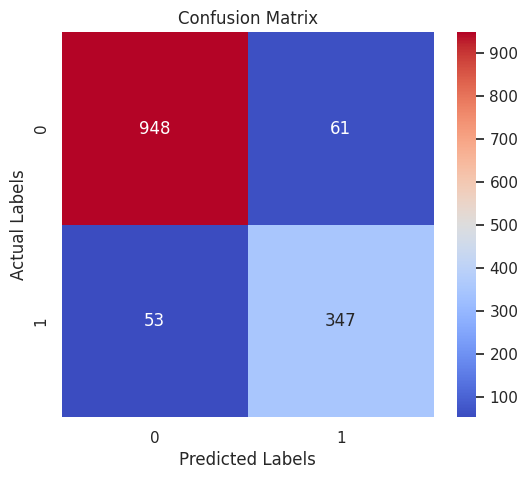

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt="d")

plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
df.columns.to_list()

['Tenure Months',
 'Monthly Charges',
 'Total Charges',
 'Churn Value',
 'Churn Score',
 'CLTV',
 'Gender_Male',
 'Senior Citizen_Yes',
 'Partner_Yes',
 'Dependents_Yes',
 'Phone Service_Yes',
 'Multiple Lines_No phone service',
 'Multiple Lines_Yes',
 'Internet Service_Fiber optic',
 'Internet Service_No',
 'Online Security_No internet service',
 'Online Security_Yes',
 'Online Backup_No internet service',
 'Online Backup_Yes',
 'Device Protection_No internet service',
 'Device Protection_Yes',
 'Tech Support_No internet service',
 'Tech Support_Yes',
 'Streaming TV_No internet service',
 'Streaming TV_Yes',
 'Streaming Movies_No internet service',
 'Streaming Movies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'Paperless Billing_Yes',
 'Payment Method_Credit card (automatic)',
 'Payment Method_Electronic check',
 'Payment Method_Mailed check']

# **6. Testing Model on Random Data**

In [ ]:
input_data = {'Tenure Months' : 7,
 'Monthly Charges' : 78.78 ,
 'Total Charges' : 551.46,
 'Churn Score' : 31,
 'CLTV' : 1602,
 'Gender' : 'Female',
 'Senior Citizen' : 'No',
 'Partner' : 'Yes',
 'Dependents' : 'No',
 'Phone Service' : 'Yes',
 'Multiple Lines' : 'No phone service',
 'Internet Service' : 'Fiber optic',
 'Online Security' : 'Yes',
 'Online Backup' : 'Yes',
 'Device Protection' : 'No internet service',
 'Tech Support' : 'No internet service',
 'Streaming TV' : 'Yes',
 'Streaming Movies' : 'Yes',
 'Contract' : 'Two year',
 'Paperless Billing' : 'Yes',
 'Payment Method' : 'Mailed check'}

input_data_df = pd.DataFrame([input_data])

training_columns = x_train.columns

input_data_df = pd.get_dummies(input_data_df , drop_first = True)
input_data_df = input_data_df.reindex(columns=training_columns, fill_value=0)

input_data_scaled = slr.transform(input_data_df)

prediction = XGB_clf.predict(input_data_scaled)
pred_prob = XGB_clf.predict_proba(input_data_scaled)

print(prediction)


print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediction Probability: {pred_prob[0][0]:.6f}, {pred_prob[0][1]:.6f}")

[0]
Prediction: No Churn
Prediction Probability: 0.999681, 0.000319
